# Dependencies

In [25]:
# import libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# import variables from cleaner file
import main_preprocessing
X_train_scaled = main_preprocessing.X_train_secondary_droppedna
X_test_scaled = main_preprocessing.X_test_secondary_droppedna
y_train = main_preprocessing.y_train_secondary_droppedna
y_test = main_preprocessing.y_test_secondary_droppedna
global_random_state = main_preprocessing.global_random_state

In [3]:
# import model saving capability for modularity
import joblib

# Modeling

### General Model

In [28]:
def fit_score(model, label):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    print(f'-----{label}-----')
    print(classification_report(y_test, y_pred))
    joblib.dump(model, f'Resources/Models/{label}.pkl') #saving fitted model for modularity/passing to server
    return [acc, f1, prec, rec]

### Random Forest

In [5]:
# random forest function
def rfc():
    clf = RandomForestClassifier(n_estimators=50, random_state=global_random_state)
    return fit_score(clf, 'rfc')

### Extremely Random Forest

In [6]:
# extremely random forest function
def erf():
    clf = ExtraTreesClassifier(n_estimators=50, random_state=global_random_state)
    return fit_score(clf, 'erf')

### Logistic Regression

In [7]:
# logistic regression function for modularization
def lr():
    log = LogisticRegression()
    return fit_score(log, 'lr')

### Support Vector Machine (SVM)

In [8]:
# svm function for modularization
def svm():
    svm = SVC(kernel='linear')
    return fit_score(svm, 'svm')

### K-Nearest Neighhor

In [9]:
# find the classifiers of similar mushrooms

In [10]:
# first determine the best number of k
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 1.000/1.000
k: 5, Train/Test Score: 1.000/1.000
k: 7, Train/Test Score: 1.000/0.999
k: 9, Train/Test Score: 1.000/0.999
k: 11, Train/Test Score: 1.000/0.999
k: 13, Train/Test Score: 1.000/0.999
k: 15, Train/Test Score: 0.999/0.999
k: 17, Train/Test Score: 0.999/0.999
k: 19, Train/Test Score: 0.999/0.999


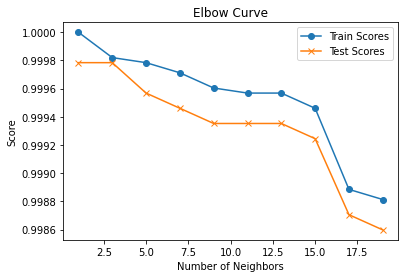

In [11]:
# graph the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label='Train Scores')
plt.plot(range(1, 20, 2), test_scores, marker='x', label='Test Scores')
plt.title('Elbow Curve')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()

In [12]:
# going to manually ignore k at low values due to risk of outlier influence and overfitting
n_neighbors_manual = int(math.sqrt(len(X_train_scaled)))

In [13]:
# knn function for modularization
def knn_final():
    knn = KNeighborsClassifier(n_neighbors=n_neighbors_manual)
    return fit_score(knn, 'knn')

### Total Comparison + Var Sav

In [14]:
# need to run each function solo or else run into iteration depth limit problem
# focus on recall score

In [29]:
rfc_computed = rfc()
rfc_computed

-----rfc-----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5069
           1       1.00      1.00      1.00      4198

    accuracy                           1.00      9267
   macro avg       1.00      1.00      1.00      9267
weighted avg       1.00      1.00      1.00      9267



[1.0, 1.0, 1.0, 1.0, 1.0]

In [30]:
erf_computed = erf()
erf_computed

-----erf-----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5069
           1       1.00      1.00      1.00      4198

    accuracy                           1.00      9267
   macro avg       1.00      1.00      1.00      9267
weighted avg       1.00      1.00      1.00      9267



[0.9998920902125823,
 0.9998808814770698,
 0.9998920902125823,
 1.0,
 0.9997617913292044]

In [31]:
lr_computed = lr()
lr_computed

-----lr-----
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      5069
           1       0.76      0.79      0.78      4198

    accuracy                           0.79      9267
   macro avg       0.79      0.79      0.79      9267
weighted avg       0.79      0.79      0.79      9267



C:\Users\Chrismus Time\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.7930290277328154,
 0.7763004432003733,
 0.7930290277328154,
 0.7605118829981719,
 0.7927584564078133]

In [32]:
svm_computed = svm()
svm_computed

### Total Classifiers

In [19]:
knn_computed = knn_final()
knn_computed

-----knn-----
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5069
           1       0.98      0.97      0.98      4198

    accuracy                           0.98      9267
   macro avg       0.98      0.98      0.98      9267
weighted avg       0.98      0.98      0.98      9267



0.978525952303874